# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-11-11 18:00:10.911497


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 11/10/20


,11/10/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,10252129,239671,2.34
Brazil,5699005,162802,2.86
India,8636011,127571,1.48
Mexico,978531,95842,9.79
United Kingdom,1237198,49861,4.03
Italy,995463,42330,4.25
France,1857309,41062,2.21


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 11/10/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
51447,US,9995860,2020-11-08,237779.0,462.0,109780.0,113819.714286
51446,US,9886080,2020-11-07,237317.0,1036.0,128468.0,109059.142857
51445,US,9757612,2020-11-06,236281.0,1154.0,124908.0,103397.571429
51444,US,9632704,2020-11-05,235127.0,1173.0,125700.0,99524.428571
51443,US,9507004,2020-11-04,233954.0,1104.0,102946.0,94453.428571
51442,US,9404058,2020-11-03,232850.0,1136.0,123056.0,90926.571429
51441,US,9281002,2020-11-02,231714.0,498.0,81880.0,84146.142857


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 11/10/20


,11/10/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,532180,33705.0,6.33
Texas,1010364,19337.0,1.91
California,989432,18066.0,1.83
Florida,852174,17248.0,2.02
New Jersey,260430,16461.0,6.32
Illinois,511183,10645.0,2.08
Massachusetts,174881,10184.0,5.82


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 11/10/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1761,California,972713,2020-11-08,17973.0,12.0,3351.0,5262.142857
1760,California,969362,2020-11-07,17961.0,30.0,6151.0,5317.000000
1759,California,963211,2020-11-06,17931.0,71.0,6357.0,5026.142857
1758,California,956854,2020-11-05,17860.0,52.0,5934.0,4743.714286
1757,California,950920,2020-11-04,17808.0,63.0,5519.0,4520.571429
1756,California,945401,2020-11-03,17745.0,56.0,4990.0,4359.000000
1755,California,940411,2020-11-02,17689.0,18.0,4533.0,4281.857143


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 11/10/20


,11/10/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,325876,7200.0,2.21
Orange,62830,1512.0,2.41
Riverside,72341,1352.0,1.87
San Bernardino,70347,1096.0,1.56
San Diego,61053,915.0,1.50
Sacramento,28237,513.0,1.82
San Joaquin,22740,497.0,2.19


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 11/10/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
5583,Los Angeles,319977,2020-11-08,7170.0,0.0,0.0,1541.000000
5582,Los Angeles,319977,2020-11-07,7170.0,13.0,2321.0,1765.571429
5581,Los Angeles,317656,2020-11-06,7157.0,17.0,2092.0,1618.428571
5580,Los Angeles,315564,2020-11-05,7140.0,23.0,2038.0,1499.142857
5579,Los Angeles,313526,2020-11-04,7117.0,20.0,1781.0,1451.000000
5578,Los Angeles,311745,2020-11-03,7097.0,21.0,1150.0,1381.142857
5577,Los Angeles,310595,2020-11-02,7076.0,2.0,1405.0,1425.857143
5576,Los Angeles,309190,2020-11-01,7074.0,3.0,1572.0,1347.142857
5575,Los Angeles,307618,2020-10-31,7071.0,15.0,1291.0,1240.142857
5574,Los Angeles,306327,2020-10-30,7056.0,12.0,1257.0,1358.000000



7 day new US cases as of 11/10/20


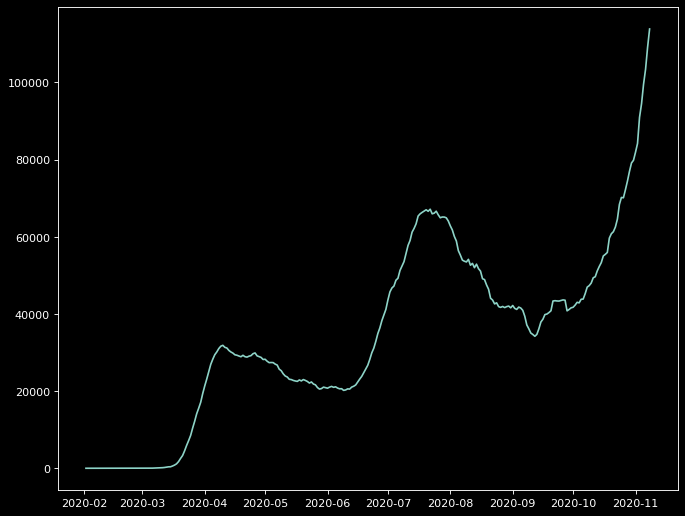

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 11/10/20


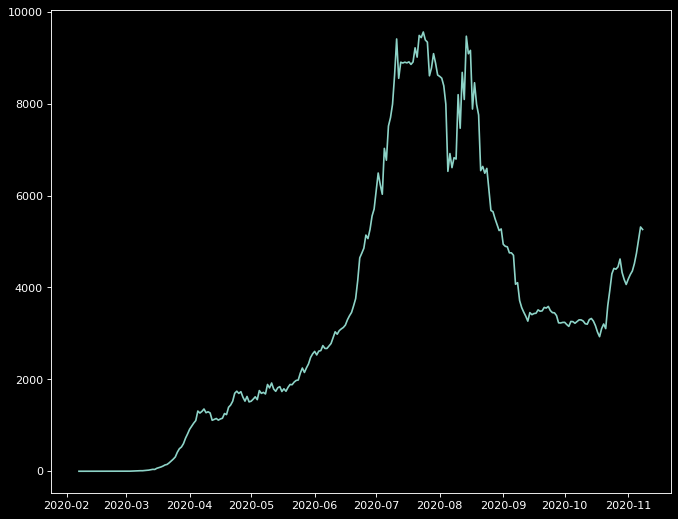

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 11/10/20


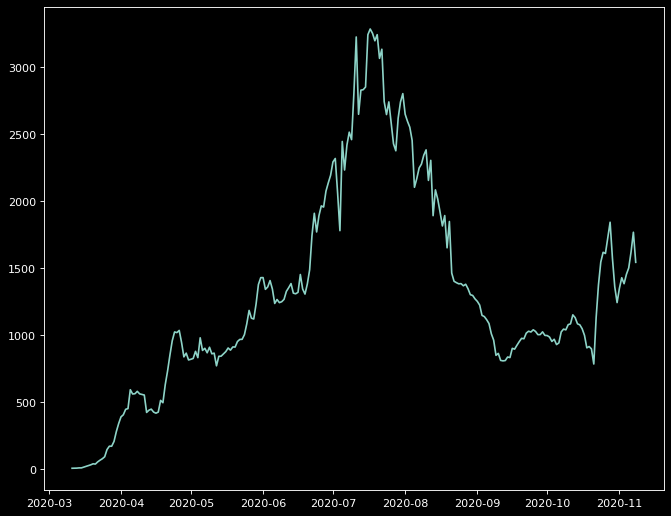

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()